# *Lecture 9*

# Multivariate Functions and Their Minimization

| |
|:---:|
|Selected Content [From **COMPUTATIONAL PHYSICS**, 3rd Ed, 2015](http://physics.oregonstate.edu/~rubin/Books/CPbook/index.html) <br>RH Landau, MJ Paez, and CC Bordeianu (deceased) <br>Copyrights: <br> [Wiley-VCH, Berlin;](http://www.wiley-vch.de/publish/en/books/ISBN3-527-41315-4/) and [Wiley & Sons, New York](http://www.wiley.com/WileyCDA/WileyTitle/productCd-3527413154.html)<br>  R Landau, Oregon State Unv, <br>MJ Paez, Univ Antioquia,<br> C Bordeianu, Univ Bucharest, 2015.<br> Support by National Science Foundation.|


## Introduction

Today we would like to expand on an important topic that is not covered in detail by Landau et al.
This is the topic of minimization of multivariate functions.
It turns out that this topic has applications in quantum mechanics (energy), statistics (likelihood), and mechanics (least action).
Of course, the "minimization" of a function can be used to find a minimum or maximum value -- just multiply by -1 to switch it around.

## Finding Roots of Multivariable Systems

Before we discuss minimization, we will focus on the generic solution of a multivariable system of equations.
In particular, we will aim to find the roots (zeros) of some multivariable system.
Then we will extend this method to find the zeros of the derivatives.
We will start with the example given in the text, just to anchor us in a familiar mechanical system.

### Physics Example

Two weights are hung from three pieces of string, and we would like to find the angles and tensions of each of the strings.

<img src="Figures/Figure_6.1.png" width="50%">

The physical constraints include geometric constraints on the lengths of the strings and the sum of forces (tension, gravitational) in the horizontal and vertical directions.

The constraints may look strange because we are treating $\cos\theta$ and $\sin\theta$ as independent variables, with a constraint equation connecting them.  This allows us to keep all of the equations as polynomial functions instead of transcendental functions.

$$\begin{align}
L_1\cos\theta_{1} + L_2\cos\theta_{2}+ L_3\cos\theta_{3} & = L,\\
L_1\sin\theta_{1} + L_2\sin\theta_{2} -L_3\sin\theta_{3} & = 0\\
\sin^2\theta_1+\cos^2\theta_1 & =  1\\
\sin^2\theta_2+\cos^2\theta_2 & =  1\\
\sin^2\theta_3+\cos^2\theta_3 & =  1\\
T_{1}\sin\theta_{1} - T_{2}\sin\theta_{2} - W_{1} & =
0,\tag*{6.6}\\ T_{1}\cos\theta_{1} - T_{2}\cos\theta_{2} & = 0\\
T_{2}\sin\theta_{2} + T_{3}\sin\theta_{3} - W_{2} & = 0\\
T_{2}\cos\theta_{2} - T_{3}\cos\theta_{3} & = 0.\tag*{6.9}\end{align}$$

The coefficients $W_i$ are the weights of the masses, $T_i$ are
the tensions in the strings, and $L_i$ are the lengths of the strings.

This is a system of nine simultaneous nonlinear equations, which can be rewritten in matrix form with unknown variables $\theta$ and $T_i$ written in an unknown vector $\overrightarrow y$. 

$$
\overrightarrow{y} =\begin{pmatrix}
x_{1} \\ x_{2} \\ x_{3} \\ x_{4} \\ x_{5} \\ x_6 \\ x_{7}\\ x_{8}
\\ x_9
\end{pmatrix} =\begin{pmatrix}
\sin\theta_{1} \\
\sin\theta_{2}\\
\sin\theta_{3} \\
\cos\theta_{1} \\
\cos\theta_2 \\
\cos\theta_3 \\
T_1 \\ T_{2}\\ T_3
\end{pmatrix}$$

The nine equations to be solved are written in a general homogeneous form with zeros
on the right-hand sides and placed in a vector:

$$\begin{align}
f_i (x_1, x_2,\ldots, x_N) & = 0,\quad i=1, N,\\
\overrightarrow{f}(\overrightarrow{y}) =\begin{pmatrix}
f_{1}(\overrightarrow{y})\\ f_{2}(\overrightarrow{y}) \\ f_3(\overrightarrow{y})\\ f_4(\overrightarrow{y})\\ f_5(\overrightarrow{y})\\
f_6(\overrightarrow{y})\\ f_7(\overrightarrow{y})\\ f_8(\overrightarrow{y})\\ f_{9}(\overrightarrow{y})
\end{pmatrix}  & =\begin{pmatrix}
3 x_4 + 4 x_5 + 4 x_6 -8 \\
 3 x_1 + 4 x_2 - 4 x_3  \\
 x_7 x_1 - x_8 x_2  -10 \\
 x_7 x_4 - x_8 x_5   \\
 x_8 x_2 + x_9 x_3 -20 \\
x_8 x_5 - x_9 x_6\\ x_1^2 + x_4^2 -1 \\ x_{2}^2 + x_5^2 - 1 \\ x_3^2 + x_6^2 -1
\end{pmatrix}
 = \overrightarrow{0}
\end{align}$$

Note that we have put in some known values for $L=8$, $W_1=10$, $W_2=20$, $L_1=3$, $L_2=4$, $L_3=4$.

### Implementation of the Multi-Dimensional Newton-Raphson Method

The idea for solving this system of non-linear equations is to use the same Newton-Raphson method that was used to solve a single non-linear equation.

Remember that the basic idea in that method was to 
* expand the function $f(x)$ about the current best guess for $x$
* approximate the Taylor series expansion with the first two terms (constant plus first derivative)
* solve the resulting linear equation for a new best guess for $x$
* repeat until the value of $f(x)$ is close enough to 0

<img src="Figures/Figure_7.2.png" width="50%">

In this case, we are looking for a set of $x_i$ values that make all nine $f_i$ equal 0 simultaneously, so instead of $f(x)$ we are treating $f(\overrightarrow{y})$.
Starting with any approximate solutions $x_i$, we would like to know the set of
corrections $\Delta x_i$ for which 

$$f_i (x_1+\Delta x_1, x_2+\Delta x_2, \ldots, x_9+\Delta x_9)= 0,
\quad i=1, 9$$

If our approximate solution is close enough to the true solution ($\Delta x_i$ are all small), then we can expand the function at that point and keep only the linear terms in the Taylor series expansion:

$$\begin{align}
f_i(x_1+\Delta x_1,\ldots x_9+\Delta x_9) \simeq f_i (x_1,\ldots x_9) +
\sum_{j=1}^9 \frac{\partial f_i} {\partial x_j} \Delta x_j &= 0\\
  i &= 1,\ldots 9
\end{align}$$

With this approximation, we have converted the system of nine non-linear equations to nine linear equations, which can be solved with linear algebra.

$$\begin{align} f_1 + \frac{\partial f_1}{\partial x_1} \Delta x_1 + \frac{\partial f_1}{\partial x_2}
\Delta x_2 + \cdots + \frac{\partial f_1}{\partial x_9}  \Delta x_9 & =  0,   \\
f_2 + \frac{\partial f_2}{\partial x_1} \Delta x_1 + \frac{\partial f_2}{\partial x_2}  \Delta x_2 + \cdots + \frac{\partial f_2}{\partial x_9}  \Delta x_9 & =  0,   \\
\vdots &  \\
 f_9 + \frac{\partial f_9}{\partial x_1}  \Delta x_1 + \frac{\partial f_9}{\partial x_2}  \Delta x_2 + \cdots + \frac{\partial f_9}{\partial x_9} \Delta x_9 & = 0
\end{align}$$

In matrix form, the system of linear equations can be written as

$$\begin{align}
\begin{pmatrix}
f_1 \\ f_2\\
\vdots\\
 f_9
 \end{pmatrix} +\begin{pmatrix}
 {\partial f_1 / \partial x_1} & {\partial f_1 / \partial x_2}
& \cdots & {\partial f_1 / \partial x_9} \\ {\partial f_2 /\partial x_1} & {\partial
f_2 / \partial x_2} & \cdots & {\partial f_2 / \partial x_9} \\
\vdots & & \ddots \\
{\partial f_9 / \partial x_1} & {\partial f_9 /
\partial x_2} & \cdots & {\partial f_9 / \partial x_9}
\end{pmatrix}
\begin{pmatrix}
\Delta x_1 \\
\Delta x_2 \\
\vdots \\        \Delta x_9
\end{pmatrix} & =         0.
\end{align}$$

In this system, the unknown values are still $x_i$.
The partial derivatives $\partial f_i/\partial x_j$ **are all known** in principle and are evaluated at the current best guess values for $x_i$.  Remember that the derivatives can also be calculated numerically.

The matrix form of this system uses vectors for the unknowns $\Delta x_i$ and the function values $f_i(x_1,\dots,x_n)$.
It also defines a matrix of derivatives that you will recognize as the Jacobian.
This matrix is applied to the unknown vector:

$$ \overrightarrow{f}+ {F'}  \overrightarrow{\Delta x} = 0,\quad \Rightarrow\quad
{F'}\overrightarrow{\Delta x} = - \overrightarrow{f}, \\
 \overrightarrow{\Delta x}  =\begin{pmatrix}
 \Delta x_1 \\
 \Delta x_2 \\
 \vdots\\
 \Delta x_9
 \end{pmatrix},\quad \overrightarrow{f} =\begin{pmatrix}
 f_1 \\
 f_2\\
\vdots \\
f_9
\end{pmatrix}, \quad  {F'} =\begin{pmatrix}
{\partial f_1 / \partial x_1} & \cdots & {\partial f_1 / \partial x_9} \\ {\partial f_2
/ \partial x_1} & \cdots & {\partial f_2 / \partial x_9} \\
\vdots & \ddots \\
{\partial f_9/\partial x_1} & \cdots & {\partial f_9 /\partial x_9}
\end{pmatrix}$$

The equation ${F'}\overrightarrow{\Delta x} = - \overrightarrow{f}$ is in the standard form for the
solution of a linear equation.
The solution for the unknown $\overrightarrow{\Delta x}$ is

$$\overrightarrow{\Delta x} = - {F'}^{-1}\overrightarrow{f}$$

where the inverse of $F'$ must exist if there is to be a unique solution.

### Jacobian Matrix

In this approach of linearizing the system of equations, the derivatives of the function are on equal footing with the function itself.
The reason is that these two represent the two terms in the Taylor series expansion.

The $N\times N$ **Jacobian matrix** contains all of the derivatives, $N$ partial derivatives for each of the $N$ equations.  (This is different from the **gradient vector** that we will see in the minimization of a multivariate function.)

$${F'} =\begin{pmatrix}
{\partial f_1 / \partial x_1} & \cdots & {\partial f_1 / \partial x_9} \\ {\partial f_2
/ \partial x_1} & \cdots & {\partial f_2 / \partial x_9} \\
\ddots \\
{\partial f_9/\partial x_1} & \cdots & {\partial f_9 /\partial x_9}
\end{pmatrix}$$

One of the keys to solving the multivariate system is to have an efficient method for calculating the Jacobian matrix.
The best case is if the derivatives can be calculated and expressed analytically.
Even then, there are
9 × 9 = 81 such derivatives for this (small) problem, and entering them
all would be both time-consuming and error-prone. In contrast,
especially for more complicated problems, it is straightforward to
program a forward-difference (or even central-difference) approximation for the derivatives,

$$
\frac{\partial f_i}{\partial x_j} \simeq \frac{f_i(x_j + \delta
x_j) - f_i(x_j)}{\delta x_j}$$

where each individual $x_j$ is varied independently for the
partial derivatives.
As with the 1-D method, the arbitrary $\delta x_j$ values are different from the non-arbitrary unknown $\Delta x_i$ values.

### Implementation

The following code implements the solution for the physical system, with automatic numerical calculation of the Jacobian matrix.

*Question*: are these derivatives "forward-difference" or "central-difference?"

To keep the code short, we use a linear algebra solver from NumPy.
The only thing we miss in this implementation is the *pleasure* of conducting the Gaussian elimination in the 9-equation system.

In [61]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# NewtonNDanimate.py:              MultiDimension Newton Search

from numpy import zeros, array
from numpy.linalg import solve

n = 9
eps = 0.1
deriv = zeros( (n, n), float)
f = zeros( (n), float)
x = array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1., 1.])

def F(x, f):                                       # F function
# There is no return value; it fills f in place for a given x vector
    f[0] = 3*x[3]  +  4*x[4]  +  4*x[5]  -  8.0
    f[1] = 3*x[0]  +  4*x[1]  -  4*x[2]
    f[2] = x[6]*x[0]  -  x[7]*x[1]  -  10.0
    f[3] = x[6]*x[3]  -  x[7]*x[4]
    f[4] = x[7]*x[1]  +  x[8]*x[2]  -  20.0
    f[5] = x[7]*x[4]  -  x[8]*x[5]
    f[6] = pow(x[0], 2)  +  pow(x[3], 2)  -  1.0
    f[7] = pow(x[1], 2)  +  pow(x[4], 2)  -  1.0
    f[8] = pow(x[2], 2)  +  pow(x[5], 2)  -  1.0
    
def dFi_dXj(x, deriv, n):                       
# There is no return value; it fills deriv in place
    h = 1e-8                                             
    for j in range(0, n):
         temp = x[j]
         x[j] = x[j] +  h/2.
         F(x, f)                                                 
         for i in range(0, n):  deriv[i, j] = f[i] 
         x[j] = temp
    for j in range(0, n):
         temp = x[j]
         x[j] = x[j] - h/2.
         F(x, f)
         for i in range(0, n): deriv[i, j] = (deriv[i, j] - f[i])/h
         x[j] = temp
         
for it in range(1, 200):
    F(x, f)                              
    dFi_dXj(x, deriv, n)   
    B = array([[-f[0]], [-f[1]], [-f[2]], [-f[3]], [-f[4]], [-f[5]], 
               [-f[6]], [-f[7]], [-f[8]]])      
    sol = solve(deriv, B)      # Solve for dx vector, not x!
    dx = sol[0:]               # First column of sol
    for i in range(0, n):
        x[i]  = x[i]  +  dx[i]
    errX = errF = errXi = 0.0
    for i in range(0, n):
        if ( x[i] !=  0.): errXi = abs(dx[i]/x[i])
        else:  errXi = abs(dx[i])
        if ( errXi > errX): errX = errXi                            
        if ( abs(f[i]) > errF ):  errF = abs(f[i])        
        if ( (errX < eps) and (errF < eps) ): break
    if ( (errX < eps) and (errF < eps) ): break

print('Number of iterations = ', it, "\n Final Solution:")
for i in range(0, n):
        print('x[', i, '] =  ', x[i])

Number of iterations =  6 
 Final Solution:
x[ 0 ] =   0.7675402903648875
x[ 1 ] =   0.2626788194713476
x[ 2 ] =   0.8383340363376323
x[ 3 ] =   0.6435142900713091
x[ 4 ] =   0.9659292222567718
x[ 5 ] =   0.5514350593555598
x[ 6 ] =   16.952806491583203
x[ 7 ] =   11.415360341871338
x[ 8 ] =   20.126378879759947


Does the number of iterations make sense?  Try to vary the value of `eps` and see if the number of iterations changes as you expect.

### Connection to Least-Squares Fit

You may remember that the "least squares" or $\chi^2$ fit also used a matrix form for a system of simultaneous equations in multiple variables.

The $\chi^2$ definition was given as
$$
 \chi^{2}  =  \sum_{i=1}^{N_{D}}
\left(\frac{y_{i} - g(x_{i}, a_m)} {\sigma_{i}}\right)^{2}$$

The $a_m$ parameters that make this $\chi^2$ an extremum (minimum) satisfy

$$
\frac{\partial\chi^{2}}{\partial a_{m}} = 0, \quad \Rightarrow\ \;
\sum_{i=1}^{N_{D}}  \frac{[y_{i}-g(x_{i})]}{\sigma_{i}^{2}}
\frac{\partial g(x_i)} {\partial a_{m}} = 0, \enspace (m=1,M_{P}).$$

If $M_P=3$, then the $\chi^2$ minimization leads to
three simultaneous equations for the three $a_m$:

$$\begin{align}
\sum_{i=1}^{N_{D}}  \frac{[y_{i}-g(x_{i})]}{\sigma_{i}^{2}}
\frac{\partial g(x_i)} {\partial a_{1}} & =  0, \quad
\frac{\partial g}{\partial a_1} =1,\\
\sum_{i=1}^{N_{D}}  \frac{[y_{i}-g(x_{i})]}{\sigma_{i}^{2}}
\frac{\partial g(x_i)} {\partial a_{2}} & =  0, \quad \frac{\partial g}{\partial a_2} =
x,\\
\sum_{i=1}^{N_{D}}   \frac{[y_{i}-g(x_{i})]}{\sigma_{i}^{2}}
 \frac{\partial g(x_i)} {\partial a_{3}} & =  0 , \quad \frac{\partial g}{\partial
 a_3}=x^2
\end{align}$$

These can, in principle, be solved with the linear algebra libraries in the same way we solved the equation for the kinematic string-and-weight system.

## Minimization of the Multivariate Function

The problem of minimizing a multivariate function occurs not only in least-squares (likelihood) fits, but also in other physics problems.
We would like to introduce the general approach and some notation that is commonly used.

We will assume that there is a single function $F({\bf x})$ to be minimized.

### Taylor Series for $F({\bf x})$: Gradient Vector and Hessian Matrix

The Taylor series expansion about a best-guess point ${\bf x}$ will require a term with first derivatives and perhaps a term with second derivatives.

The first derivatives are collected in a **gradient vector** (or simply **gradient**) ${\bf G}({\bf x}) = \nabla F$, with components defined by

$$G_i({\bf x}) = \frac{\partial F({\bf x})}{\partial x_i}$$

Note that this is analogous to the Jacobian matrix for a system of equations, but it is just one column with $N$ components now because there is only one function (like a one-equation system).

The second derivatives are collected in a **Hessian matrix** ${\bf H}({\bf x})$, with components defined by 

$$H_{ij}({\bf x}) = \frac{\partial^2 F({\bf x})}{\partial x_i \partial x_j}$$

Obviously ${\bf H}({\bf x})$ is a $N \times N$ matrix.
The dimensions are the same as the Jacobian, but the components are completely different!

The Hessian is very often symmetric, since the order of differentiation does not matter for continuous functions.
This can be a nice check that the Hessian makes sense.

With these definitions, we can rewrite the Taylor series about the best-guess vector ${\bf x}$ to the second derivative terms, :

$$F({\bf x} + {\bf \Delta x}) = F({\bf x}) 
+ \sum_{i=1}^N G_i({\bf x}) \Delta x_i
+ \frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N H_{ij}({\bf x}) \Delta x_i \Delta x_j 
+ \cdots
$$

Keeping with the matrix form, we can convert the $\Delta x_i$ components to a column vector, just as for the unknown $x_i$ in a system of equations: 

$${\bf \Delta x} = 
\begin{pmatrix}
\Delta x_1 \\ \Delta x_2\\
\vdots\\
\Delta x_N
 \end{pmatrix}
$$

And we can use this to write the Taylor series expansion in vector-matrix form.
(Since ${\bf G}$ is a column vector, we need to use its transpose.)

$$
F({\bf x} + {\bf \Delta x}) = F({\bf x}) 
+ {\bf G}({\bf x})^T {\bf \Delta x}
+ \frac{1}{2} {\bf \Delta x}^T {\bf H}({\bf x}) {\bf \Delta x}
+ \cdots
$$

It may be obvious to those of you who have taken linear algebra that 
${\bf \Delta x}^T {\bf H}({\bf x}) {\bf \Delta x}$ is the sum of $N^2$ terms, each of which is 
$x_i H_{ij} x_j$.

### Method of Steepest (Gradient) Descent (Linear Approximation)

We explored very carefully the Newton-Raphson method for solving an equation in 1 dimension.
It seems reasonable to try and apply the same method for the minimization of a multivariate function.
Because the gradient vector ${\bf G}({\bf x})$ points in the direction of the steepest ascent, we know that $-{\bf G}({\bf x})$ points in the direction of the steepest descent.
This is what we want for a minimization problem.

In fact, the rate of change of $F$ in the direction of $\bf \Delta x$ is simply

$${\bf G}({\bf x})^T {\bf \Delta x}$$

(If this is not clear, try constructing the partial derivative of $F$ at $\bf x$.)

To find the minimum (extremum), we would like to move as quickly as possible "downhill" to the minimum.
We need to find a unit vector $\bf \Delta x$ that maximizes the (negative) rate of change.
It turns out that the correct unit vector is simply along the steepest descent.  This seems obvious in hindsight.

We need to find the multiplicative constant $k$ that minimizes
$$F({\bf x} + k{\bf G}({\bf x}))$$

Then we can update the best guess for ${\bf x}$ to be ${\bf x} + k{\bf G}({\bf x})$.

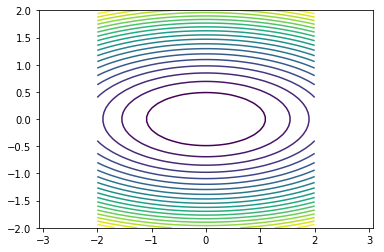

In [63]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sopt

def F(x):
    return 0.5*x[0]**2 + 2.5*x[1]**2

def dF(x):
    # Precomputed analytic derivatives (gradient vector)
    return np.array([x[0], 5*x[1]])

xmesh, ymesh = np.mgrid[-2:2:50j,-2:2:50j] #50 points in each direction, a terrible Python hack
fmesh = F(np.array([xmesh, ymesh]))

plt.axis("equal")
plt.contour(xmesh, ymesh, fmesh, 20)
plt.show()

In [65]:
x_values = [np.array([2., 0.4])]
x = x_values[-1]

def f1d(k):
    return F(x + k*G)

k = 0.
for i in range(5):
    G = -dF(x)
    k = (sopt.minimize(f1d, k)).x # Minimize returns a OptimizeResult object
    next_x = x + k*G
    x_values.append(next_x)
    x = next_x
print(x_values)

[array([2. , 0.4]), array([ 1.33333333, -0.26666667]), array([0.88888889, 0.17777778]), array([ 0.59259259, -0.11851852]), array([0.39506173, 0.07901234]), array([ 0.26337449, -0.0526749 ])]


[[ 2.          0.4       ]
 [ 1.33333335 -0.26666665]
 [ 0.88888891  0.17777776]
 [ 0.59259261 -0.1185185 ]
 [ 0.39506174  0.07901233]
 [ 0.2633745  -0.05267488]]


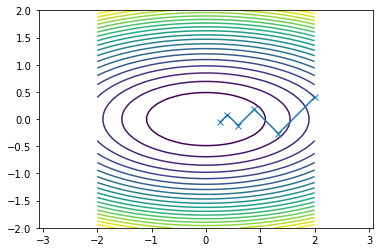

In [29]:
plotting_array = np.array(x_values)
print(plotting_array)
plt.axis("equal")
plt.contour(xmesh, ymesh, fmesh, 20)
plt.plot(plotting_array.T[0],plotting_array.T[1], "x-")
plt.show()

### Method of Quadratic Iteration

We did not discuss any quadratic approximation that would extend the Newton-Raphson method, but the extension is logical.
Instead of defining a linear function by taking terms through the first derivative, we can define a quadratic function by taking terms through the second derivative (Hessian):

$$Q({\bf x + \Delta x}) = F({\bf x})
+ \sum_{i=1}^N G_i \Delta x_i
+ \frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \Delta x_i H_{ij} \Delta x_j
$$

Then we would like to find the point where the derivatives are all 0:

$$\frac{\partial Q({\bf x + \Delta x})}{\partial x_k} = 
G_k +
\sum_{j=1}^N H_{kj} \Delta x_j = 0
$$

In other words:
$$ 
\sum_{j=1}^N H_{kj} \Delta x_j = -G_k
$$

and in matrix form:

$${\bf H}({\bf x}) {\bf \Delta x} = -{\bf G}({\bf x})$$

Now it is obvious what we have to do.
We have to solve the matrix equation right above to find the "change vector" ${\bf \Delta x}$.
Then we adjust the best guess for $\bf x$ to be ${\bf x + \Delta x}$.
This iterative procedure continues until the derivatives (and therefore the adjustments) are all small, within some predefined precision requirement.


## Application: Maximum Likelihood Estimator in Higgs Boson Search

In a search for new particles, we expect the observed data to be composed of "signal" and "background" events.
If we have some way to estimate the expected background contribution $b$, then we can use the observed number of data events $n$ to provide an estimate of the number of signal events $s$.
The most likely value of $s$ is the one that maximizes the likelihood function based on the Poisson probability:

$$L(n,s,b) = \frac{e^{-s-b} (s+b)^n}{n!}$$

It is more common to minimize $-\ln L$ in this calculation.

$$\ln L(n,s) = -s -b + n\ln(s+b) - \ln n!$$
$$-\ln L(n,s) = s +b - n\ln(s+b) + \ln n!$$

In this case, we can even calculate the derivative analytically:

$$\frac{\partial \ln L}{\partial s} = -1 + \frac{n}{s+b}$$


In [18]:
from math import factorial
def lnL(n, s, b):
    return s + b - n*np.log(s+b) + np.log(factorial(n))

def dlnLds(n, s, b):
    return 1 - n/(s+b)

# some tests of the functions
print(lnL(3, 1.0, 1.9))
print(dlnLds(3, 1.0, 1.9))

1.4976272582507701
-0.034482758620689724


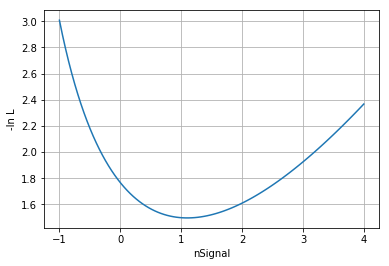

In [25]:
nobs = 3
nbkg = 1.9
svalues = np.linspace(-1, 4, 100)
plt.plot(svalues, lnL(nobs, svalues, nbkg))
plt.xlabel('nSignal')
plt.ylabel('-ln L')
plt.grid(); plt.show()

The `nSignal` value that minimizes $-\ln L$ is the most probable value.
You may also remember that $\pm 1 \sigma$ corresponds to 0.5 units of $\ln L$ above the minimum.
How can we find the correct measurement, with uncertainties?
Clearly we should look for the point where $\partial \ln L/\partial s = 0$.

In [49]:
s = 0.
ds = 0.01
eps = 0.01
imax = 10

# Find the most probable value
for it in range(0, imax + 1):
    F = dlnLds(nobs, s, nbkg)
    if ( abs(F) <= eps ):                         # Check for convergence
        print("Root found at s = %.5f, F = %.5e, tolerance eps = %e" % (s, F, eps)) 
        break
    print("Iteration ", it, " s = ", s, ", dlnLds(s) = ", F)
    df = (dlnLds(nobs, s + ds, nbkg) - dlnLds(nobs, s, nbkg))/ds
    ds = - F/df 
    s += ds                                               # New guess
    
signal_mpv = s

Iteration  0  s =  0.0 , dlnLds(s) =  -0.5789473684210527
Iteration  1  s =  0.70033333333334 , dlnLds(s) =  -0.1536982438148926
Iteration  2  s =  1.1400554814814827 , dlnLds(s) =  0.013175904757489199
Root found at s = 1.09359, F = -2.13987e-03, tolerance eps = 1.000000e-02


In [58]:
# Now find the places where ln L changes by 0.5 units.
minL = lnL(nobs, signal_mpv, nbkg)
print("minL value is", minL)

def f(s):
    return lnL(nobs, s, nbkg) - minL - 0.5

def bisection(xminus, xplus, Nmax, eps):       # x-,x+ Nmax error
    for it in range(0,Nmax):
        x=(xminus+xplus)/2                     # Mid point
        print("iteration %2d: x = %.6f and f(x) = %9.6f" % (it, x, f(x)))
        if (f(xplus)*f(x)>0):                      # Root in other half
            xplus=x                            # Change x+ to x
        else:
            xminus=x                           # Change x- to x
        if(xplus-xminus<eps):                           # Converged?
            print("root found with precision eps = ",eps)
            break
        if it==Nmax-1:
             print("root not found after Nmax iterations ")   
    return x

print(bisection(-1., signal_mpv, 1000, 0.01))
print(bisection(signal_mpv, 4., 1000, 0.01))


minL value is 1.4959294522514823
iteration  0: x = 0.046797 and f(x) = -0.255929
iteration  1: x = -0.476601 and f(x) =  0.160087
iteration  2: x = -0.214902 and f(x) = -0.084543
iteration  3: x = -0.345752 and f(x) =  0.027102
iteration  4: x = -0.280327 and f(x) = -0.031170
iteration  5: x = -0.313039 and f(x) = -0.002671
iteration  6: x = -0.329396 and f(x) =  0.012053
iteration  7: x = -0.321218 and f(x) =  0.004651
root found with precision eps =  0.01
-0.3212175404799289
iteration  0: x = 2.546797 and f(x) = -0.233925
iteration  1: x = 3.273399 and f(x) =  0.038639
iteration  2: x = 2.910098 and f(x) = -0.106224
iteration  3: x = 3.091748 and f(x) = -0.035780
iteration  4: x = 3.182573 and f(x) =  0.000950
iteration  5: x = 3.137161 and f(x) = -0.017537
iteration  6: x = 3.159867 and f(x) = -0.008324
iteration  7: x = 3.171220 and f(x) = -0.003694
iteration  8: x = 3.176897 and f(x) = -0.001374
root found with precision eps =  0.01
3.1768967643398214


The fitted value for the Higgs signal is $1.09 ^{+2.09} _{-1.41}$ events.